In [301]:
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
utils_dir = os.path.join(parent_dir, "src", "utils")
sys.path.append(utils_dir)

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from process_data import process_data

In [303]:
X_train_path= os.path.join("..", "data","original_input", "X_train_filled.csv")
X_train_preprocessed = pd.read_csv(X_train_path, delimiter=',')
X_test_path= os.path.join("..", "data","original_input", "X_test_GgyECq8.csv")
X_test_preprocessed = pd.read_csv(X_test_path, delimiter=',')
y_train_path= os.path.join("..", "data","original_input", "y_train_jJtXgMX.csv")
y_train_preprocessed = pd.read_csv(y_train_path, delimiter=',')

delivery_start = X_test_preprocessed["DELIVERY_START"]

X_train_preprocessed

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
1,2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2,2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
3,2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
4,2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 17:00:00+00:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11
10601,2023-03-29 18:00:00+00:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66
10602,2023-03-29 19:00:00+00:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01
10603,2023-03-29 20:00:00+00:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74


In [304]:
X_train_preprocessed.set_index("DELIVERY_START", inplace=True)
X_test_preprocessed.set_index("DELIVERY_START", inplace=True)
y_train_preprocessed.set_index("DELIVERY_START", inplace=True)
X_train_preprocessed.index = pd.to_datetime(X_train_preprocessed.index, utc=True)
X_test_preprocessed.index = pd.to_datetime(X_test_preprocessed.index, utc=True)
y_train_preprocessed.index = pd.to_datetime(y_train_preprocessed.index, utc=True)

In [305]:
del_start = X_train_preprocessed.index


In [306]:
X_train_preprocessed

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-29 17:00:00+00:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11
2023-03-29 18:00:00+00:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66
2023-03-29 19:00:00+00:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01


In [307]:
X_train_preprocessed.isna().sum()

load_forecast                      24
coal_power_available                1
gas_power_available                 1
nucelear_power_available            1
wind_power_forecasts_average       24
solar_power_forecasts_average      24
wind_power_forecasts_std           24
solar_power_forecasts_std          24
predicted_spot_price             8759
dtype: int64

In [308]:
print(X_train_preprocessed.isna().sum())

load_forecast                      24
coal_power_available                1
gas_power_available                 1
nucelear_power_available            1
wind_power_forecasts_average       24
solar_power_forecasts_average      24
wind_power_forecasts_std           24
solar_power_forecasts_std          24
predicted_spot_price             8759
dtype: int64


In [309]:
def fill_with_local_mean(series):
    # Use rolling window to calculate mean, centering the window
    rolling_mean = series.rolling(window=5, min_periods=1, center=True).mean()
    
    # Fill NaNs in the original series with values from the rolling mean
    filled_series = series.fillna(rolling_mean)
    
    # Fill any remaining NaNs by propagating non-NaN values forward and then backward
    filled_series.ffill(inplace=True)  # Forward fill
    filled_series.bfill(inplace=True)  # Backward fill
    
    return filled_series


# Exclude 'predicted_spot_price' column and fill NaNs for other columns
columns_to_fill = X_train_preprocessed.columns[X_train_preprocessed.columns != 'predicted_spot_price']
for column in columns_to_fill:
    X_train_preprocessed[column] = fill_with_local_mean(X_train_preprocessed[column])

# Check the result
print(X_train_preprocessed.isna().sum())

load_forecast                       0
coal_power_available                0
gas_power_available                 0
nucelear_power_available            0
wind_power_forecasts_average        0
solar_power_forecasts_average       0
wind_power_forecasts_std            0
solar_power_forecasts_std           0
predicted_spot_price             8759
dtype: int64


In [310]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Assuming y_train_preprocessed and X_train_preprocessed are your initial DataFrames

# Scale 'spot_id_delta' and 'load_forecast'
spot_id_delta_s = scaler.fit_transform(y_train_preprocessed[['spot_id_delta']])
load_for_s = scaler.fit_transform(X_train_preprocessed[['load_forecast']])

# Calculate 'fill_values' as the difference, then scale it
fill_values = load_for_s - spot_id_delta_s
fill_values_s = scaler.fit_transform(fill_values)

# Extract 'predicted_spot_price', handle NaN and non-NaN separately
predicted_spot_price = X_train_preprocessed['predicted_spot_price']
nan_mask = predicted_spot_price.isna()

# For non-NaN values of 'predicted_spot_price', scale them
predicted_spot_price_non_nan = predicted_spot_price[~nan_mask]
predicted_spot_price_non_nan_scaled = scaler.fit_transform(predicted_spot_price_non_nan.values.reshape(-1, 1))

# Assign scaled non-NaN back to the original DataFrame (this maintains the index)
X_train_preprocessed.loc[~nan_mask, 'predicted_spot_price'] = predicted_spot_price_non_nan_scaled.flatten()

# Prepare scaled fill_values for NaN positions, ensuring the length matches
# Note: We directly use nan_mask here to filter fill_values_s to the length of NaN entries in 'predicted_spot_price'
fill_values_s_for_nan = fill_values_s[nan_mask]

# Assign the scaled fill values to NaN positions in 'predicted_spot_price'
X_train_preprocessed.loc[nan_mask, 'predicted_spot_price'] = fill_values_s_for_nan[:np.sum(nan_mask)].flatten()

# Optionally, if you want to ensure 'predicted_spot_price' is scaled uniformly after all operations:
# (Considering the potential alteration from filling in NaNs)
pred_spot_price_s = scaler.fit_transform(X_train_preprocessed[['predicted_spot_price']])


In [311]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#spot_id_delta_s = scaler.fit_transform(y_train_preprocessed["spot_id_delta"].to_numpy().reshape(-1, 1))
#load_for_s = scaler.fit_transform(X_train_preprocessed["load_forecast"].to_numpy().reshape(-1, 1))
#fill_values = load_for_s - spot_id_delta_s
#del_start = X_train_preprocessed.index
#fill_values_s = scaler.fit_transform(fill_values)
#nan_indices = X_train_preprocessed['predicted_spot_price'].isna()
#uncompleted_predicted_spot = X_train_preprocessed['predicted_spot_price'].dropna()
#d = {"DELIVERY_START": del_start, "predicted_spot_price" : uncompleted_predicted_spot}
#uncompleted_predicted_spot = pd.DataFrame(data = d)
#uncompleted_predicted_spot_s = scaler.fit_transform(X_train_preprocessed['predicted_spot_price'].to_numpy().reshape(-1, 1))
#X_train_preprocessed.loc[nan_indices, 'predicted_spot_price'] = fill_values[nan_indices]
#pred_spot_price_s = X_train_preprocessed['predicted_spot_price']

In [312]:
X_train_preprocessed['predicted_spot_price'].isna().sum()

0

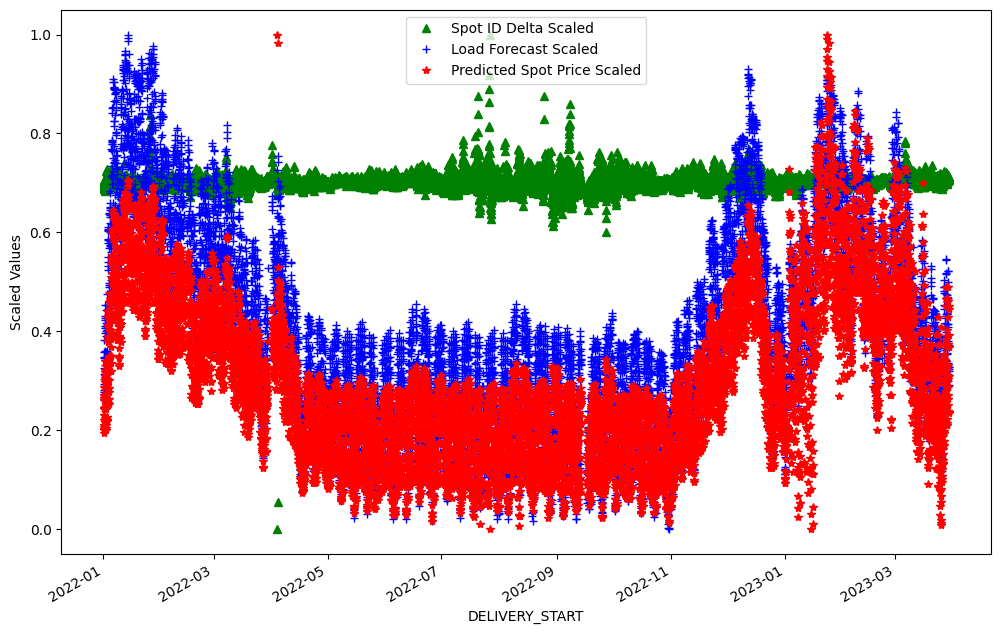

In [313]:
import matplotlib.pyplot as plt

# Initialize the figure with a larger size
fig, ax = plt.subplots(figsize=(12, 8))  # For example, 12 inches by 8 inches

# Assuming 'del_start', 'spot_id_delta_s', 'load_for_s', and 'pred_spot_price_s' are properly defined

# Plot each series
ax.plot(del_start, spot_id_delta_s, 'g^', label='Spot ID Delta Scaled')
ax.plot(del_start, load_for_s, 'b+', label='Load Forecast Scaled')
ax.plot(del_start, pred_spot_price_s, 'r*', label='Predicted Spot Price Scaled')

# Setting legend, and labels for x and y axis
ax.legend()
ax.set_xlabel('DELIVERY_START')
ax.set_ylabel('Scaled Values')

# Optionally, format the x-axis with datetime formatting for better readability
plt.gcf().autofmt_xdate()  # Auto-format date for readability

plt.show()  # Display the plot


[0.7057222  0.71395845 0.69458936 ... 0.60297808 0.70743591 0.79199062]


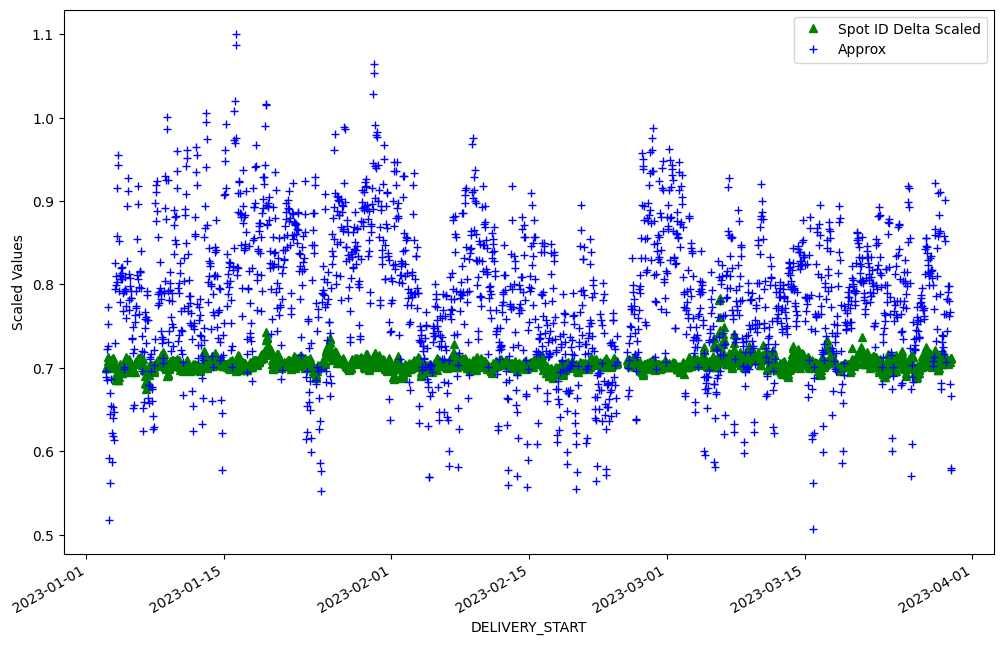

In [314]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'del_start' is the index of your data and it's timezone-aware similar to the timestamps mentioned
# Filter the series to include only the desired date range
start_date = '2023-01-03 01:00:00+01:00'
end_date = '2023-03-29 23:00:00+02:00'

# Convert start and end dates to datetime objects to handle timezones correctly
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the data based on the desired date range
mask = (del_start >= start_date) & (del_start <= end_date)
filtered_del_start = del_start[mask]
filtered_spot_id_delta_s = spot_id_delta_s[mask]
filtered_load_for_s = load_for_s[mask]
filtered_pred_spot_price_s = pred_spot_price_s[mask]

# Initialize the figure with a larger size
fig, ax = plt.subplots(figsize=(12, 8))  # For example, 12 inches by 8 inches

# Plot each series within the filtered date range

spot_approx = filtered_load_for_s - filtered_pred_spot_price_s + np.mean(filtered_spot_id_delta_s)

#spot_array = spot_approx[0]  # Access the NumPy array, assuming it's the first element

# Now apply np.diff to the array
spot_approx_diff = np.diff(spot_approx, n=1, axis=0)
spot_approx_diff = np.insert(spot_approx_diff, 0, 0)+np.mean(filtered_spot_id_delta_s)
print(spot_approx_diff)
spot_approx_diff_2 = np.diff(spot_approx_diff, n=1, axis=0)
spot_approx_diff_2 = np.insert(spot_approx_diff_2, 0, 0)+np.mean(filtered_spot_id_delta_s)

ax.plot(filtered_del_start, filtered_spot_id_delta_s, 'g^', label='Spot ID Delta Scaled')
#ax.plot(filtered_del_start, filtered_load_for_s, 'b+', label='Load Forecast Scaled')
#ax.plot(filtered_del_start, filtered_pred_spot_price_s, 'r*', label='Predicted Spot Price Scaled')
ax.plot(filtered_del_start, spot_approx, 'b+', label='Approx')
#ax.plot(filtered_del_start, spot_approx_diff, 'r+', label='Approx_diff')
#ax.plot(filtered_del_start, spot_approx_diff_2, 'r+', label='Approx_diff')


# Setting legend, and labels for x and y axis
ax.legend()
ax.set_xlabel('DELIVERY_START')
ax.set_ylabel('Scaled Values')

# Optionally, format the x-axis with datetime formatting for better readability
plt.gcf().autofmt_xdate()  # Auto-format date for readability

plt.show()  # Display the plot


In [315]:
spot_approx, spot_approx_diff

(array([[0.68865463],
        [0.69689088],
        [0.68575804],
        ...,
        [0.5780778 ],
        [0.57979151],
        [0.66605993]]),
 array([0.7057222 , 0.71395845, 0.69458936, ..., 0.60297808, 0.70743591,
        0.79199062]))

In [316]:
X_train_preprocessed.isna().sum()

load_forecast                    0
coal_power_available             0
gas_power_available              0
nucelear_power_available         0
wind_power_forecasts_average     0
solar_power_forecasts_average    0
wind_power_forecasts_std         0
solar_power_forecasts_std        0
predicted_spot_price             0
dtype: int64

In [317]:
X_train = process_data(X_train_preprocessed.copy(deep=True),None, None, "standard")
X_test = process_data(X_test_preprocessed.copy(deep=True), None, None, "standard")
y_train = process_data(y_train_preprocessed.copy(deep=True), None, None, None)

In [318]:
# Initialize Linear Regression model
lr = LinearRegression()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error', cv=5)

# Fit SFS on the training data
sfs.fit(X_train, y_train)

# Get the support mask of selected features
selected_features = sfs.get_support()

# Names/indices of the selected features
selected_indices = [i for i, x in enumerate(selected_features) if x]
print("Selected feature indices:", selected_indices)

# Evaluate model performance with selected features
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]


lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)

d = {"DELIVERY_START" : delivery_start, "spot_id_delta" : y_pred.reshape(-1)}
y_pred = pd.DataFrame(data = d)

y_pred.to_csv("../data/output_y_test/y_test_result_LR5.csv", index = False)

Selected feature indices: [0, 4, 6, 7]


In [319]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector

# Assuming X, y are your features and target variables
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor with specified hyperparameters
best_params_trees = {
    'criterion': 'squared_error',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2
}
tree_regressor = DecisionTreeRegressor(**best_params_trees)

# Apply Sequential Feature Selector
# Here, 'n_features_to_select' can be adjusted based on how many features you want to select.
# 'direction' can be 'forward' for forward selection or 'backward' for backward selection.
sfs = SequentialFeatureSelector(tree_regressor, n_features_to_select='auto', direction='forward')

# Fit the SFS on your training data
# Note: Depending on the size of your dataset and the complexity of the model, this step might take some time.
sfs.fit(X_train, y_train)

# Transform the training and testing sets to only include the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Fit the Decision Tree Regressor on the selected features
tree_regressor.fit(X_train_selected, y_train)


DecisionTreeRegressor(max_features='sqrt')

In [320]:
y_pred = tree_regressor.predict(X_test_selected)

d = {"DELIVERY_START" : delivery_start, "spot_id_delta" : y_pred.reshape(-1)}
y_pred = pd.DataFrame(data = d)

y_pred.to_csv("../data/output_y_test/y_test_result_decisiontree2.csv", index = False)